Code related to prepare data for gc related analysis presented in figure 4

## Step 1: hand draw gc boundary in Fiji

In [16]:
from matplotlib import pyplot as plt
import skimage
import pandas as pd
import numpy as np

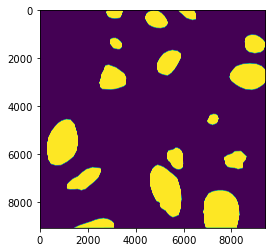

In [4]:
# this is the hand drawn boundary of GCs
gcmask = skimage.io.imread('/home/bkzhu/super_mario/tonsil_v2/Codex/tiled/GC_mask.tif')
plt.imshow(gcmask)

## step 2: extend out or in from the boundary

code below is quite slow, takes ~20min since the image is large

In [6]:
pathout = '/home/bkzhu/super_mario/tonsil_v2/Codex/tiled/inward_step' # location to save out

steps = 10 # extend out 10 steps
footprint = skimage.morphology.disk(30) # each step is 30 pixel disk extension

img = gcmask.copy()
img[img!=0] = 1
# inward
img_bf = img.copy()
for i in range(steps):
    idx = i+1
    img = skimage.morphology.binary_dilation(img_bf, footprint).astype(int)
    rng = img - img_bf
    img_bf = img.copy()
    #skimage.io.imsave(pathout+str(idx)+'.tif',rng.astype('uint8'), check_contrast=False) # save out each ring

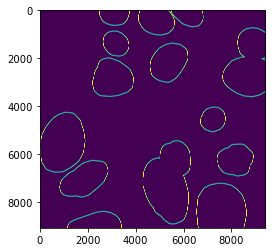

In [7]:
# example of wht the ring region looks like
plt.imshow(rng.astype('uint8'))

In [8]:
# similarly we can do erosion
pathout = '/home/bkzhu/super_mario/tonsil_v2/Codex/tiled/outward_step'

steps = 10
footprint = skimage.morphology.disk(30)

img = gcmask.copy()
img[img!=0] = 1
# inward
img_bf = img.copy()
for i in range(steps):
    idx = i+1
    img = skimage.morphology.binary_erosion(img_bf, footprint).astype(int)
    rng = img_bf - img
    img_bf = img.copy()
    #skimage.io.imsave(pathout+str(idx)+'.tif',rng.astype('uint8'), check_contrast=False)
    

## step 3: assing each input codex cell a region meta column

In [13]:
# previously prepared codex data
match_input = pd.read_csv('/home/bkzhu/super_mario/tonsil_v2/Codex/FCS_output_DeepCell_extOnly/formatch_clusters_x28_y715V2_xy.csv')
match_input

,Unnamed: 0,X,cellLabelInImage,cellSize,HOECHST1,CD38,CD19,CD31,Vimentin,CD22,...,CD27,CD104,CD273,FAPalpha,Ecadherin,PointNum,cluster.term,seurat_res1.0,centroid_x,centroid_y
0,6118,8142,1,51,6267.294118,0.143310,0.614983,0.016350,0.299605,1.000000,...,0.187309,0.025635,0.026118,0.214350,0.178581,reg001_X02_Y07_Z09,B-CD22-CD40,8,1.725490,510.843137
1,6119,8143,2,53,6805.830189,0.069681,1.000000,0.153656,1.000000,0.718178,...,0.188372,0.073011,1.000000,0.338075,0.342726,reg001_X02_Y07_Z09,B-CD22-CD40,7,1.754717,881.490566
2,6120,8144,3,57,4889.789474,0.438127,1.000000,0.044091,0.273363,0.443502,...,0.046056,0.286851,1.000000,0.789193,0.340269,reg001_X02_Y07_Z09,B-Ki67,6,1.964912,1287.526316
3,6122,8147,6,56,4450.660714,0.000000,1.000000,0.050185,0.274332,1.000000,...,0.077036,0.028937,0.000000,0.166796,0.082396,reg001_X02_Y07_Z09,B-CD22-CD40,0,1.910714,660.875000
4,6123,8148,7,79,8951.000000,0.114900,0.412287,0.039873,0.418782,0.769603,...,0.119464,0.018779,0.000000,0.067358,0.166426,reg001_X02_Y07_Z09,B-CD22-CD40,4,2.291139,851.860759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178914,244723,307664,4081,46,4188.065000,0.000000,0.516711,0.079410,0.000000,0.904165,...,0.000000,0.010496,0.000000,0.000000,0.000000,reg001_X08_Y15_Z06,B-CD22-CD40,0,9069.152174,8730.326087
178915,244724,307665,4082,65,4169.923000,0.210978,0.034039,0.010116,0.024256,0.000000,...,1.000000,0.032785,0.104098,0.257564,0.106543,reg001_X08_Y15_Z06,CD4 T,1,9069.292308,8789.384615
178916,244725,307666,4083,75,9355.747000,0.086992,0.020658,0.005740,0.334716,0.000000,...,0.462894,0.077727,0.280892,0.638970,0.230461,reg001_X08_Y15_Z06,CD4 T,1,9068.853333,9216.053333
178917,244726,307667,4084,77,7284.675000,0.143877,0.785678,0.138733,0.184268,1.000000,...,0.083775,0.079336,0.120146,0.439836,0.316185,reg001_X08_Y15_Z06,B-CD22-CD40,0,9068.948052,8273.857143


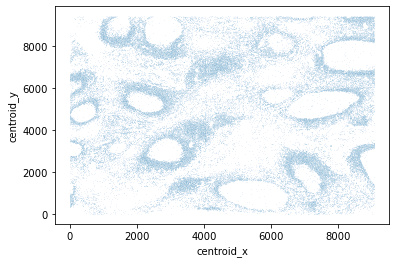

In [14]:
# check the centroides calculated previously
test = match_input[match_input['cluster.term'] == 'B-CD22-CD40']

import seaborn as sns

sns.scatterplot(data=test, x="centroid_x", y="centroid_y",s=0.1)

In [17]:
# now gather all the regions produced during the dialation and erosion
# and assing cells the meta data about these regions

root_path = '/home/bkzhu/super_mario/tonsil_v2/Codex/tiled/'
# loop through all the steps

# container
shape_of_each_view=(1008, 1344)
y = shape_of_each_view[0]*9 
x = shape_of_each_view[1]*7
allDataStitch = np.zeros((y,x), dtype = np.float32) # container

#step_pixel = {}

for i in range(20):
    idx = i + 1
    if idx <=10: # inside GC
        target = "outward_step"
        step = idx
        rng = skimage.io.imread(root_path + target + str(step) + ".tif")
        rng[rng!=0] = idx
        allDataStitch = allDataStitch + rng
    if idx > 10:
        target = "inward_step"
        step = idx - 10
        rng = skimage.io.imread(root_path + target + str(step) + ".tif")
        rng[rng!=0] = idx
        allDataStitch = allDataStitch + rng
        
    #indexes = np.where(rng==1)
    #step_pixel[idx] = indexes

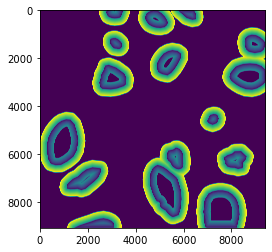

In [18]:
# quick check
plt.imshow(allDataStitch)

In [19]:
for n in range(match_input.shape[0]):
    
    x = round(match_input.loc[n,'centroid_x'])
    y = round(match_input.loc[n,'centroid_y'])
    
    label = allDataStitch[x,y]
    match_input.loc[n,'step'] = int(label)

In [20]:
match_input

,Unnamed: 0,X,cellLabelInImage,cellSize,HOECHST1,CD38,CD19,CD31,Vimentin,CD22,...,CD104,CD273,FAPalpha,Ecadherin,PointNum,cluster.term,seurat_res1.0,centroid_x,centroid_y,step
0,6118,8142,1,51,6267.294118,0.143310,0.614983,0.016350,0.299605,1.000000,...,0.025635,0.026118,0.214350,0.178581,reg001_X02_Y07_Z09,B-CD22-CD40,8,1.725490,510.843137,0.0
1,6119,8143,2,53,6805.830189,0.069681,1.000000,0.153656,1.000000,0.718178,...,0.073011,1.000000,0.338075,0.342726,reg001_X02_Y07_Z09,B-CD22-CD40,7,1.754717,881.490566,0.0
2,6120,8144,3,57,4889.789474,0.438127,1.000000,0.044091,0.273363,0.443502,...,0.286851,1.000000,0.789193,0.340269,reg001_X02_Y07_Z09,B-Ki67,6,1.964912,1287.526316,0.0
3,6122,8147,6,56,4450.660714,0.000000,1.000000,0.050185,0.274332,1.000000,...,0.028937,0.000000,0.166796,0.082396,reg001_X02_Y07_Z09,B-CD22-CD40,0,1.910714,660.875000,0.0
4,6123,8148,7,79,8951.000000,0.114900,0.412287,0.039873,0.418782,0.769603,...,0.018779,0.000000,0.067358,0.166426,reg001_X02_Y07_Z09,B-CD22-CD40,4,2.291139,851.860759,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178914,244723,307664,4081,46,4188.065000,0.000000,0.516711,0.079410,0.000000,0.904165,...,0.010496,0.000000,0.000000,0.000000,reg001_X08_Y15_Z06,B-CD22-CD40,0,9069.152174,8730.326087,0.0
178915,244724,307665,4082,65,4169.923000,0.210978,0.034039,0.010116,0.024256,0.000000,...,0.032785,0.104098,0.257564,0.106543,reg001_X08_Y15_Z06,CD4 T,1,9069.292308,8789.384615,0.0
178916,244725,307666,4083,75,9355.747000,0.086992,0.020658,0.005740,0.334716,0.000000,...,0.077727,0.280892,0.638970,0.230461,reg001_X08_Y15_Z06,CD4 T,1,9068.853333,9216.053333,0.0
178917,244726,307667,4084,77,7284.675000,0.143877,0.785678,0.138733,0.184268,1.000000,...,0.079336,0.120146,0.439836,0.316185,reg001_X08_Y15_Z06,B-CD22-CD40,0,9068.948052,8273.857143,13.0


In [ ]:
# then save out
#match_input.to_csv('/home/bkzhu/super_mario/tonsil_v2/Codex/FCS_output_DeepCell_extOnly/formatch_clusters_x28_y715_wstepV2.csv')